In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Dataset of power consumption of three different distribution networks of Tetouan ctiy located north Morocco
# Originally had 52417 instances and after cleaning, we were left with about 401 data points.
df= pd.read_csv('/Users/rgseoo7/Downloads/Tetuan City power consumption.csv')

# 3. Calculation of statistics
# Here we chose two features: temperature and wind speed and calculated the mean, median, variance, and standard deviation.
# Here the agg function will use the numpy import to calculate the temperature and wind speed mean, median, variance, and standard deviation
# given the statistics, we can understand how to extarct data from a row or column to calculate certain statistics.
columns = ['Temperature','Wind Speed']
mean = df[columns].agg(np.mean)
median = df[columns].agg(np.median)
variance = df[columns].agg(np.var)
std = df[columns].agg(np.std)

print('Mean Value:\n',mean)
print('Median Value:\n',median)
print('Variance Value:\n',variance)
print('Standard Deviation Value:\n',std)


Mean Value:
 Temperature    11.544907
Wind Speed      0.162642
dtype: float64
Median Value:
 Temperature    12.070
Wind Speed      0.077
dtype: float64
Variance Value:
 Temperature    12.612602
Wind Speed      0.376376
dtype: float64
Standard Deviation Value:
 Temperature    3.551423
Wind Speed     0.613495
dtype: float64


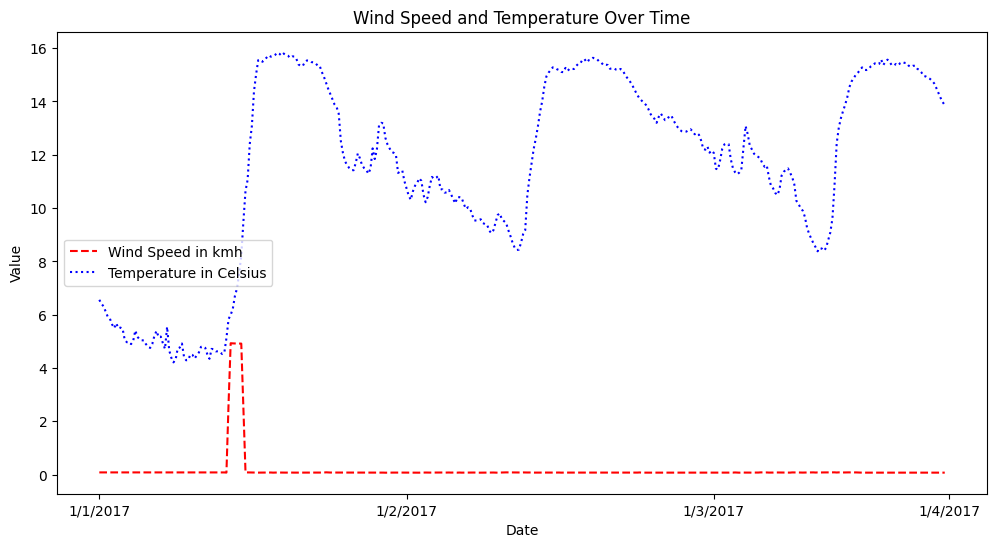

In [2]:
# Plot the wind speed and temperature data as line charts
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Wind Speed'],ls='dashed',color='r', label='Wind Speed in kmh')
plt.plot(df['DateTime'], df['Temperature'],ls='dotted',color='b', label='Temperature in Celsius')
plt.xticks([0,145,290,401],['1/1/2017','1/2/2017','1/3/2017','1/4/2017'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Wind Speed and Temperature Over Time')
plt.legend()
plt.show()

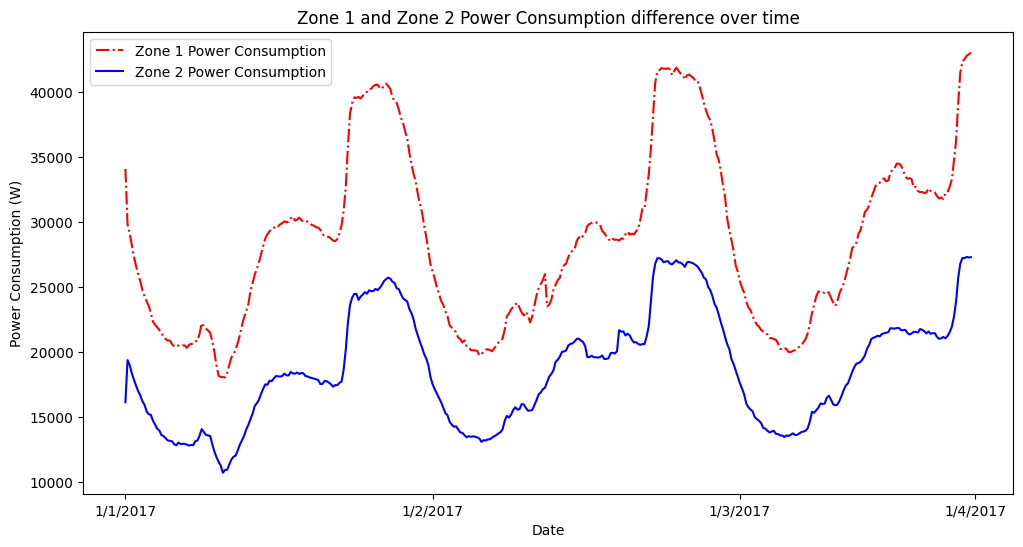

In [3]:
# Plot the difference in power consumption of zone 1 and zone 2 as line charts
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Zone 1 Power Consumption'],ls='dashdot',color='r', label='Zone 1 Power Consumption')
plt.plot(df['DateTime'], df['Zone 2  Power Consumption'],ls='solid',color='b', label='Zone 2 Power Consumption')
plt.xticks([0,145,290,401],['1/1/2017','1/2/2017','1/3/2017','1/4/2017'])
plt.xlabel('Date')
plt.ylabel('Power Consumption (W)')
plt.title('Zone 1 and Zone 2 Power Consumption difference over time')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


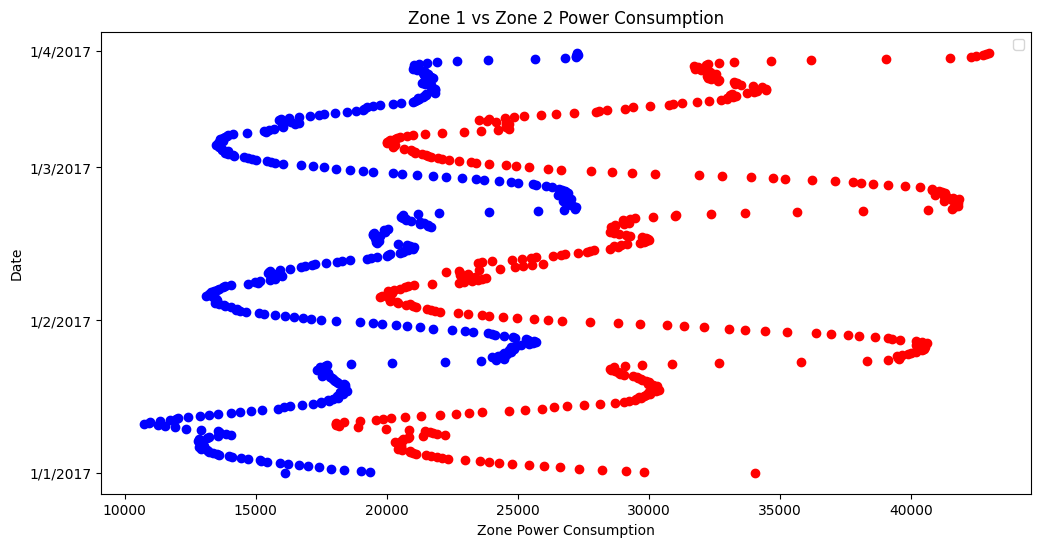

In [4]:
#Plot the difference in power consumption of zone 1 and 2 as scatter plots
plt.figure(figsize=(12, 6))
plt.scatter(df['Zone 1 Power Consumption'], df['DateTime'], color='r')
plt.scatter(df['Zone 2  Power Consumption'], df['DateTime'], color='b')
plt.yticks([0,145,290,401],['1/1/2017','1/2/2017','1/3/2017','1/4/2017'])
plt.xlabel('Zone Power Consumption')
plt.ylabel('Date')
plt.title('Zone 1 vs Zone 2 Power Consumption')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


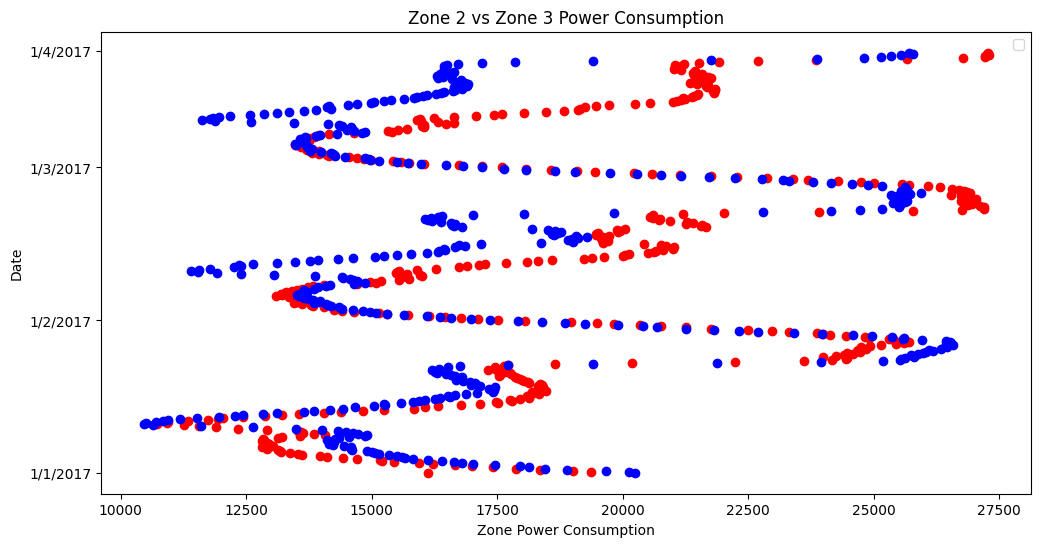

In [5]:
#Plot the difference in power consumption of zone 2 and 3 as scatter plots
plt.figure(figsize=(12, 6))
plt.scatter(df['Zone 2  Power Consumption'], df['DateTime'], color='r')
plt.scatter(df['Zone 3  Power Consumption'], df['DateTime'], color='b')
plt.yticks([0,145,290,401],['1/1/2017','1/2/2017','1/3/2017','1/4/2017'])
plt.xlabel('Zone Power Consumption')
plt.ylabel('Date')
plt.title('Zone 2 vs Zone 3 Power Consumption')
plt.legend()
plt.show()

In [6]:
#5.
from sklearn.model_selection import train_test_split

# Define the features and target variables
X = df[['Wind Speed', 'Temperature']]
y = df['Humidity']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and validation sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate the mean squared error (MSE) on the validation set
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)

Training set shape: (280, 2) (280,)
Validation set shape: (120, 2) (120,)
Mean squared error: 37.29077395872227
